### TEST AVEC PLUSIEURS IMAGES

In [180]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize
from matplotlib.colors import LogNorm
from scipy import ndimage
from scipy import fftpack

In [181]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image en couleur
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    #plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value


In [182]:
# Bloc de fonctions pour le débruitage

def apply_fourier_transform(image):
    fourier = np.fft.fft2(image)
    fourier_shifted = np.fft.fftshift(fourier)
    return fourier_shifted

def display_fourier_transform(fourier_shifted, title):
    # Calculer la magnitude de la transformée de Fourier
    magnitude_spectrum = np.abs(fourier_shifted)
    # Appliquer une échelle logarithmique pour une meilleure visualisation
    magnitude_spectrum = np.log(magnitude_spectrum + 1)
    
    # Affichage de la magnitude de la transformée de Fourier
    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def apply_inverse_fourier_transform(filtered_fourier):
    filtered_fourier_shifted_back = np.fft.ifftshift(filtered_fourier)
    denoised_image = np.fft.ifft2(filtered_fourier_shifted_back)
    denoised_image = np.abs(denoised_image)  # Prendre l'amplitude réelle
    return denoised_image

def apply_low_pass_filter(fourier_shifted, radius):
    # dimensions de l'image dans le domaine fréquentiel
    rows, cols = fourier_shifted.shape
    
    # centre de l'image en fréquence (basses fréquences)
    center_row, center_col = rows // 2, cols // 2
    
    # masque représentant la suppression de fréquence
    mask = np.zeros((rows, cols), dtype=np.uint8)
    
    # parcourir chaque pixel pour créer un cercle autour du centre
    for i in range(rows):
        for j in range(cols):
            # distance au carré du pixel (i, j) par rapport au centre
            # si distance est inférieure ou égale au rayon^2, le pixel est dans les basses fréquences
            if (i - center_row)**2 + (j - center_col)**2 <= radius**2:
                # assigner une valeur de 1 dans le masque pour conserver cette fréquence
                mask[i, j] = 1
    
    # Appliquer le masque
    filtered_fourier = fourier_shifted * mask
    
    # Retourner la transformée de Fourier contenant uniquement les basses fréquences
    return filtered_fourier

def apply_gaussian_low_pass_filter(fourier_shifted, sigma):
    # dimensions de l'image dans le domaine fréquentiel
    rows, cols = fourier_shifted.shape

    # centre de l'image en fréquence (basses fréquences)
    center_row, center_col = rows // 2, cols // 2

    # filtre gaussien basé sur la distance au centre
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = ((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = np.exp(-distance / (2 * sigma ** 2))
    
    # Appliquer le masque
    filtered_fourier = fourier_shifted * mask

    # Retourner la transformée de Fourier contenant uniquement les basses fréquences
    return filtered_fourier



##### TEST AVEC DES IMAGES EN NIVEAU DE GRIS

In [183]:
# Importer et traiter une image
def import_image_gray(filename, target_size=(512, 512)):
    image = ski.io.imread(filename)
    
    # Redimensionner l'image
    image = resize(image, target_size, anti_aliasing=True)
    print(f"Image {filename} importée avec forme: {image.shape}")
    
    # Si l'image est en couleur (3 canaux), la convertir en niveaux de gris
    if image.ndim == 3 and image.shape[2] == 3:  
        image = rgb2gray(image)  
        print(f"Image convertie en niveaux de gris: {image.shape}")
    
    # Si l'image a 2 canaux (par exemple, alpha et RGB en 2D), on la transforme en un seul canal
    if image.ndim == 3 and image.shape[2] == 2:
        image = image[:, :, 0]
        print(f"Image avec 2 canaux convertie en niveaux de gris: {image.shape}")
        
    return np.array(image)

In [184]:
def get_images():
    images = []
    path = '../img_test/gris/pgm'
    for filename in os.listdir(path):
        if filename.endswith('.pgm'):
            print(f"Lecture du fichier: {filename}")
            image = import_image_gray(os.path.join(path, filename))
            if image is not None:
                print(f"Forme de l'image après redimensionnement: {image.shape}")
                images.append(image)
    return np.array(images)

images = get_images()
print(images.shape)

Lecture du fichier: airplaneU2.pgm
Image ../img_test/gris/pgm\airplaneU2.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: boats.pgm
Image ../img_test/gris/pgm\boats.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: bridge.pgm
Image ../img_test/gris/pgm\bridge.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: cameraman.pgm
Image ../img_test/gris/pgm\cameraman.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: clown.pgm
Image ../img_test/gris/pgm\clown.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: couple.pgm
Image ../img_test/gris/pgm\couple.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: crowd.pgm
Image ../img_test/gris/pgm\crowd.pgm

In [185]:
# Fonction pour ajouter du bruit à une image

# Bruit sel et poivre
def noise_salt_pepper(image, amount=0.05):
    image_noised = ski.util.random_noise(image, mode='s&p', amount=amount) * 255
    return image_noised.astype(np.uint8)

# Bruit gaussien
def noise_gaussian(image, var=0.01):
    image_noised = ski.util.random_noise(image, mode='gaussian', var=var) * 255
    return image_noised.astype(np.uint8)
 

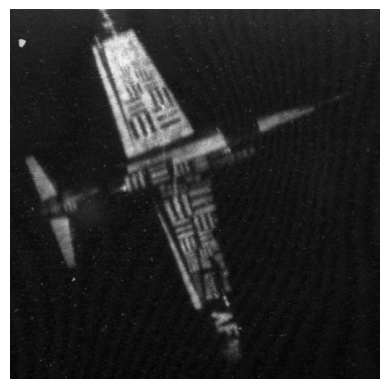

In [186]:
test_image = images[0]
display_image(test_image, 'Test image')

In [187]:
# Créer un tableau d'images bruitées

def get_noisy_image_salt_pepper(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_salt_pepper(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

def get_noisy_image_gaussian(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_gaussian(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

noisy_images_salt_pepper = get_noisy_image_salt_pepper(images)
noisy_images_gaussian = get_noisy_image_gaussian(images)

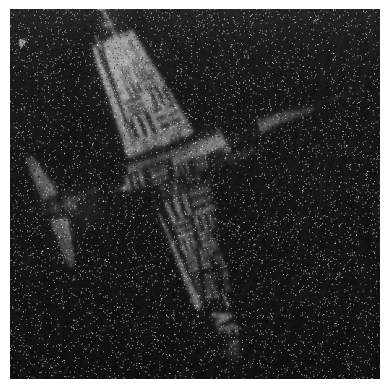

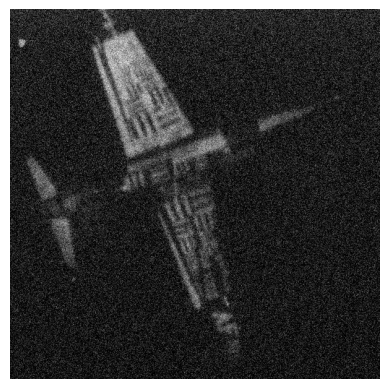

In [188]:
test_image_noisy_salt_pepper = noisy_images_salt_pepper[0]
test_image_noisy_gaussian = noisy_images_gaussian[0]
display_image(test_image_noisy_salt_pepper, 'Test image bruitée sel et poivre')
display_image(test_image_noisy_gaussian, 'Test image bruitée gaussien')

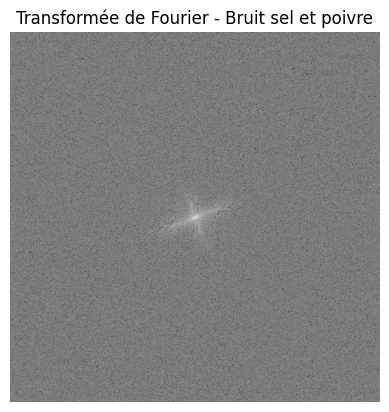

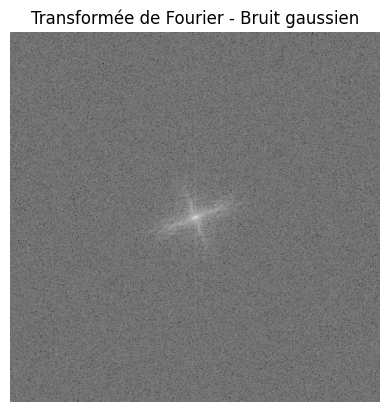

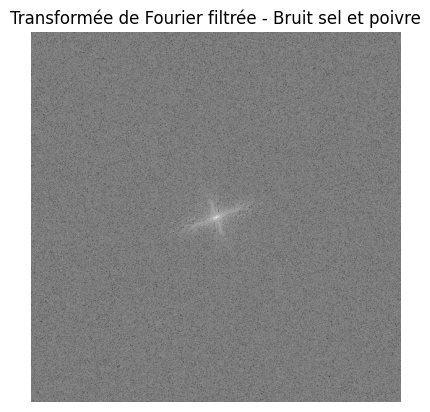

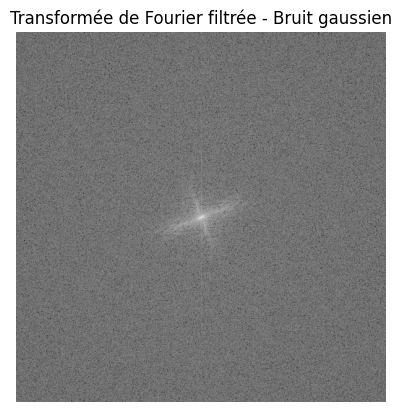

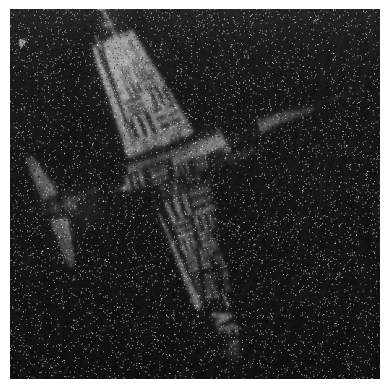

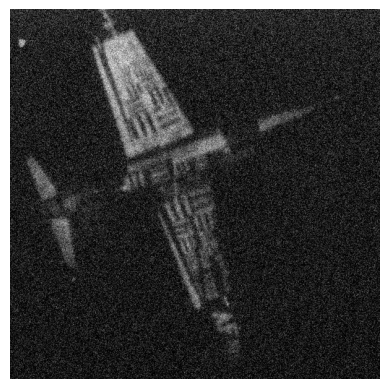

PSNR pour le bruit sel et poivre: 13.125076352509367
PSNR pour le bruit gaussien: 14.781601668981498


In [189]:
# Test debruitage (filtre passe-bas)
test_image_noisy_salt_pepper = noisy_images_salt_pepper[0]
test_image_noisy_gaussian = noisy_images_gaussian[0]

# Appliquer la transformée de Fourier
image_fourier_salt_pepper = apply_fourier_transform(test_image_noisy_salt_pepper)
image_fourier_gaussian = apply_fourier_transform(test_image_noisy_gaussian)

# Afficher la transformée de Fourier
display_fourier_transform(image_fourier_salt_pepper, 'Transformée de Fourier - Bruit sel et poivre')
display_fourier_transform(image_fourier_gaussian, 'Transformée de Fourier - Bruit gaussien')

# Appliquer un filtre passe-bas
filtered_fourier_salt_pepper = apply_low_pass_filter(image_fourier_salt_pepper, radius=500)
filtered_fourier_gaussian = apply_gaussian_low_pass_filter(image_fourier_gaussian, sigma=500)

# Afficher la transformée de Fourier après filtrage
display_fourier_transform(filtered_fourier_salt_pepper, 'Transformée de Fourier filtrée - Bruit sel et poivre')
display_fourier_transform(filtered_fourier_gaussian, 'Transformée de Fourier filtrée - Bruit gaussien')

# Afficher la transformée de Fourier inverse
denoised_image_salt_pepper = apply_inverse_fourier_transform(filtered_fourier_salt_pepper)
denoised_image_gaussian = apply_inverse_fourier_transform(filtered_fourier_gaussian)

# Afficher l'image débruitée
display_image(denoised_image_salt_pepper, 'Image débruitée - Bruit sel et poivre')
display_image(denoised_image_gaussian, 'Image débruitée - Bruit gaussien')

# Calcul du PSNR
psnr_salt_pepper = psnr(test_image, denoised_image_salt_pepper)
psnr_gaussian = psnr(test_image, denoised_image_gaussian)
print(f"PSNR pour le bruit sel et poivre: {psnr_salt_pepper}")
print(f"PSNR pour le bruit gaussien: {psnr_gaussian}")

In [190]:
# Affichage d'une courbe moyenne du psnr de l'image débruitée et de l'image originale des images pour le bruit sel et poivre (résultats erronés)

def image_denoising_low_pass(images, noisy_images, radius):
    denoised_images = []
    psnr_values = []
    for i in range(len(images)):
        image = images[i]
        noisy_image = noisy_images[i]
        image_fourier = apply_fourier_transform(noisy_image)
        filtered_fourier = apply_low_pass_filter(image_fourier, radius)
        denoised_image = apply_inverse_fourier_transform(filtered_fourier)
        denoised_images.append(denoised_image)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    return np.array(denoised_images), np.array(psnr_values)

def image_denoising_gaussian_low_pass(images, noisy_images, sigma):
    denoised_images = []
    psnr_values = []
    for i in range(len(images)):
        image = images[i]
        noisy_image = noisy_images[i]
        image_fourier = apply_fourier_transform(noisy_image)
        filtered_fourier = apply_gaussian_low_pass_filter(image_fourier, sigma)
        denoised_image = apply_inverse_fourier_transform(filtered_fourier)
        denoised_images.append(denoised_image)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    return np.array(denoised_images), np.array(psnr_values)

def display_curb_psnr(psnr_means, title):
    plt.figure()
    plt.plot(psnr_means)
    plt.title(title)
    plt.xlabel('Taille du paramètre (rayon ou sigma)')
    plt.ylabel('PSNR en dB')
    plt.show()

In [191]:
# Affichage de la courbe de PSNR pour le bruit sel et poivre en fonction du rayon (pour UNE image)

def psnr_courbe_salt_pepper(image, noisy_image_salt_pepper, radius):
    psnr_values = []
    for i in range(1, radius+1):
        image_fourier = apply_fourier_transform(noisy_image_salt_pepper)
        filtered_fourier = apply_low_pass_filter(image_fourier, radius=i)
        denoised_image = apply_inverse_fourier_transform(filtered_fourier)
        psnr_value = psnr(image, denoised_image)
        print(f"PSNR pour le rayon {i}: {psnr_value}")
        psnr_values.append(psnr_value)
    return np.array(psnr_values)

In [192]:
# Affichage de la courbe de PSNR pour le bruit gaussien en fonction du sigma (pour UNE image)

def psnr_courbe_gaussian(image, noisy_image_gaussian, sigma):
    psnr_values = []
    for i in range(1, sigma+1):
        image_fourier = apply_fourier_transform(noisy_image_gaussian)
        filtered_fourier = apply_gaussian_low_pass_filter(image_fourier, sigma=i)
        denoised_image = apply_inverse_fourier_transform(filtered_fourier)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    return np.array(psnr_values)

In [193]:
# # Courbe moyenne psnr pour sel et poivre (courbe éronnée)
# psnr_values_salt_pepper_low_pass = []
# for i in range(1, 100, 5):
#     denoised_images, psnr_values = image_denoising_low_pass(images, noisy_images_salt_pepper, i)
#     psnr_values_salt_pepper_low_pass.append(np.mean(psnr_values))

# psnr_values_salt_pepper_low_pass = np.array(psnr_values_salt_pepper_low_pass)

# display_curb_psnr(psnr_values_salt_pepper_low_pass, 'PSNR moyen pour le bruit sel et poivre avec filtre passe-bas')

In [194]:
# # Courbe moyenne psnr pour gaussien (courbe éronnée)
# psnr_values_salt_pepper_gaussian_low_pass = []
# for i in range(1, 100, 5):
#     denoised_images, psnr_values = image_denoising_gaussian_low_pass(images, noisy_images_gaussian, i)
#     psnr_values_salt_pepper_gaussian_low_pass.append(np.mean(psnr_values))

# psnr_values_salt_pepper_gaussian_low_pass = np.array(psnr_values_salt_pepper_gaussian_low_pass)

# display_curb_psnr(psnr_values_salt_pepper_gaussian_low_pass, 'PSNR moyen pour le bruit gaussien avec filtre gaussien passe-bas')

PSNR pour le rayon 1: 16.47857660160972
PSNR pour le rayon 2: 16.29596814864662
PSNR pour le rayon 3: 16.033514735769593
PSNR pour le rayon 4: 15.832112493117908
PSNR pour le rayon 5: 15.735058892826949
PSNR pour le rayon 6: 15.699473952336664
PSNR pour le rayon 7: 15.675433312845703
PSNR pour le rayon 8: 15.654392511615981
PSNR pour le rayon 9: 15.620160913801238
PSNR pour le rayon 10: 15.600151939864737
PSNR pour le rayon 11: 15.580836255816852
PSNR pour le rayon 12: 15.56339270418708
PSNR pour le rayon 13: 15.548916544749108
PSNR pour le rayon 14: 15.535099622581328
PSNR pour le rayon 15: 15.522907190588622
PSNR pour le rayon 16: 15.513102970800217
PSNR pour le rayon 17: 15.501541712293232
PSNR pour le rayon 18: 15.492634015930653
PSNR pour le rayon 19: 15.483152389385026
PSNR pour le rayon 20: 15.47281052247187
PSNR pour le rayon 21: 15.465843482099547
PSNR pour le rayon 22: 15.457077740219507
PSNR pour le rayon 23: 15.448550935357279
PSNR pour le rayon 24: 15.441881432981411
PSNR 

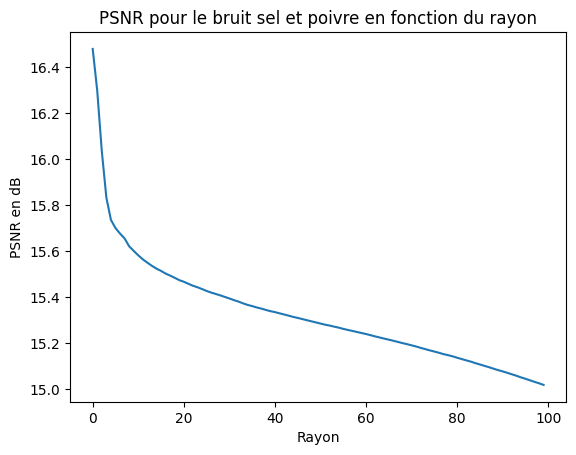

In [195]:
# Courbe de PSNR pour le bruit sel et poivre en fonction du rayon (pour LA première image)
image_test_0 = images[0]
test_image_noisy_salt_pepper_test_0 = noisy_images_salt_pepper[0]
psnr_values = psnr_courbe_salt_pepper(image_test_0, test_image_noisy_salt_pepper_test_0, 100)
plt.figure()
plt.plot(psnr_values)
plt.title('PSNR pour le bruit sel et poivre en fonction du rayon')
plt.xlabel('Rayon')
plt.ylabel('PSNR en dB')
plt.show()

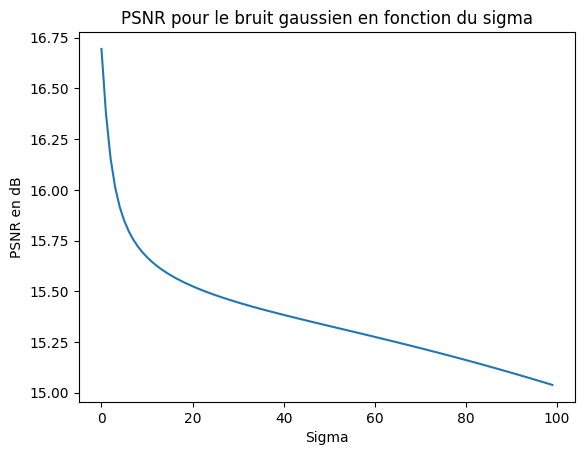

In [196]:
# Courbe de PSNR pour le bruit gaussien en fonction du sigma (pour LA première image)
image_test_0 = images[0]
test_image_noisy_salt_pepper_test_0 = noisy_images_salt_pepper[0]
psnr_values = psnr_courbe_gaussian(image_test_0, test_image_noisy_salt_pepper_test_0, 100)
plt.figure()
plt.plot(psnr_values)
plt.title('PSNR pour le bruit gaussien en fonction du sigma')
plt.xlabel('Sigma')
plt.ylabel('PSNR en dB')
plt.show()